In [161]:
from gerador import gerador_instancias
import pandas as pd
import matplotlib
import time

## Implementação simples dos algoritmos para construção e consulta em uma Segment Tree de soma

Legenda de parâmetros:
a: array para o qual a seg tree está sendo construída // v: índice do vertice atual da árvore // l: limite esquerdo do intervalo do vertice // r: limite direito do intervalo do vertice.

In [162]:
def constroi(a: list, v: int, l: int, r: int) -> None:  
    if v == 1:     
        global st
        st = [0] * (4*len(a)) # tamanho da arvore é O(4n)
    
    if( l == r ):
        st[v] = a[l] # nós folhas (caso base)
        return None
    else:
        m = (l + r) // 2

        constroi(a, v*2, l, m) # calcula o filho da esquerda recursivamente
        constroi(a, v*2+1, m + 1, r) # calcula o filho da direita recursivamente
        
        st[v] = st[v*2] + st[v*2 + 1] # o valor de um vértice interno é soma dos valores dos seus filhos
        
        return None

Legenda de parâmetros:
v: índice do vertice atual da árvore // il: limite esquerdo do intervalo de interesse // ir: limite direito do intervalo de interesse // l: limite esquerdo do intervalo do vertice // r: limite direito do intervalo do vertice.

In [163]:
# v: idx do vertice # il: limite esquerdo do intervalo de interesse #ir: limite direito do intervalo de interesse # l: limite esquerdo do intervalo do vertice # r: limite direito do intervalo do vertice
def consulta(v: int, il: int, ir: int, l: int, r: int) -> int:
    global st
    

    print(il, ir)
    
    
    if(l > r): # intervalo desejado está fora do intervalo do vértice atual
        print("if 1")
        return 0

    if(il == l and ir == r): # intervalo de interesse casa com o intervalo do vertice atual
        print("if 2")
        return st[v]
    
    im = (il + ir) // 2

    return consulta(2*v, il, im, l, min(im + 1, r)) + consulta(2*v + 1, im + 1 , ir, max(l, im + 1), r)

In [164]:
b = [0, 1, 3, 5, -2, 3]



constroi(b, 1, 0, 5)

print(st)

[0, 10, 4, 6, 1, 3, 3, 3, 0, 1, 0, 0, 5, -2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [165]:
instancias = gerador_instancias(500, 5, 100000)
tamanho_col = []
tempo_construcao_col = []  

for i in range(len(instancias)):
    
    cur_inst = instancias[i]

    start_time = time.time()

    arvore = constroi(cur_inst, 1, 0, (len(cur_inst)-1))

    tempo_construcao = time.time() - start_time

    tamanho_col.append(len(cur_inst))

    tempo_construcao_col.append(tempo_construcao)

In [166]:
df = pd.DataFrame(columns=["tamanho", "tempo_construcao"])

df["tamanho"] = tamanho_col
df["tempo_construcao"] = tempo_construcao_col 

In [167]:
df

,tamanho,tempo_construcao
0,26716,0.012979
1,10879,0.005561
2,53347,0.025558
3,83125,0.040076
4,40125,0.020492
...,...,...
495,44519,0.021900
496,54671,0.029594
497,44329,0.021793
498,48329,0.024250


<Axes: xlabel='tempo_construcao', ylabel='tamanho'>

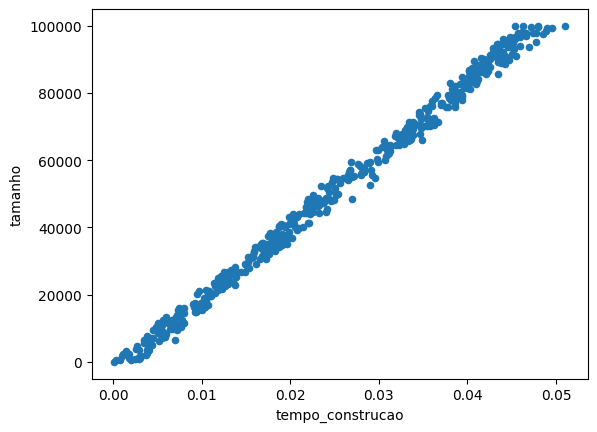

In [168]:
df.plot("tempo_construcao", "tamanho", "scatter")